In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Superstore_USA1.csv", encoding="ISO-8859-1")


In [3]:
df.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28/05/2012,30/05/2012,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/07/2010,08/07/2010,4.56,4,13.01,88522


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9354 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [7]:
df['Order Year'] = df['Order Date'].dt.year

In [8]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

<Axes: xlabel='Order Year', ylabel='count'>

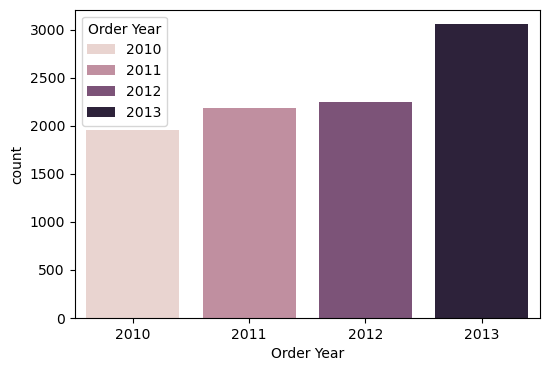

In [37]:
plt.figure(figsize=(6,4))

sns.countplot(data=df,x = 'Order Year',hue='Order Year')

The bar chart shows a steady increase in order counts from 2010 to 2013, with the highest order volume in 2013. 
This trend suggests growing customer demand over time, indicating successful business growth and a potential need for enhanced inventory management and marketing efforts to sustain this upward trajectory.

In [38]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order Year              0
dtype: int64

## Profit

<Axes: xlabel='Product Category', ylabel='Profit'>

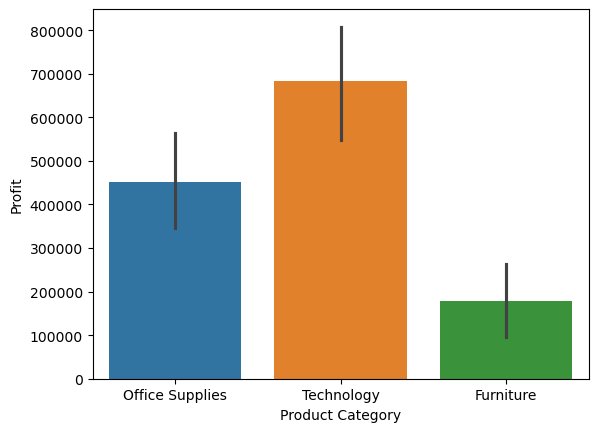

In [42]:
sns.barplot(x ='Product Category',y='Profit',estimator='sum',data = df,hue='Product Category')

## 📈 **Profit Analysis by Product Category**

### **Insights**
- **Technology** generates the highest profit, surpassing **800,000**, indicating strong demand or high margins.
- **Office Supplies** follows with moderate profitability, around **500,000**.
- **Furniture** shows the lowest profit, suggesting potential areas for cost optimization or sales improvement.

---

### **Key Focus Areas**
1. **Leverage Technology Products** 🔋  
   Focus on expanding the Technology category, as it shows the highest profitability. Consider investing in marketing or product variety to capture more market share.

2. **Optimize Furniture Sales** 📉  
   Investigate factors limiting profit in the Furniture category and explore strategies to increase its profitability, such as product bundling or targeted promotions.

3. **Sustain Office Supplies Performance** 📦  
   Maintain the steady performance of Office Supplies by ensuring competitive pricing and consistent supply, while exploring ways to enhance profitability.

*This analysis helps prioritize efforts across product categories for maximized profit growth.*


In [9]:
df['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

## 📊 **Insights**

### **Top-Performing States**
- **California**: 1,021
- **Texas**: 646
- **Illinois**: orts.*ndations**
1. **Invest in High-Performing States** 🏆  
   Allocate more resources and marketing efforts to California, Texas, and Illinois to capitalize on existing engagement.

2. **Target Low-Engagement States** 🚀  
   Develop targeted campaigns for states with lower cDelaware likeWyomingxico and Vermont, to increase brand presence and tap intd profitability.*


<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

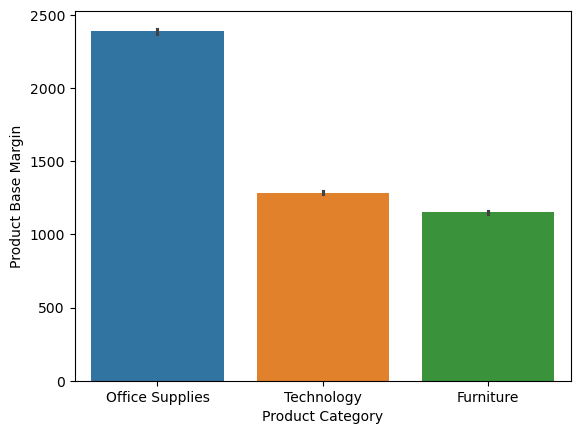

In [48]:
sns.barplot(x ='Product Category',y='Product Base Margin',estimator='sum',data = df,hue='Product Category')

# Product Base Margin Analysis

This bar plot displays the **Product Base Margin** for each **Product Category**.

### **Analysis**
- **Office Supplies** has the highest base margin, reaching around **2,500**, which may indicate efficient cost management or favorable supplier terms.
- **Technology** and **Furniture** categories have comparatively lower base margins, suggesting potential areas to negotiate supplier costs or improve profit margins.

---

### **Optimization Strategies**
1. **Maximize Office Supplies Profitability** 📦  
   Capitalize on the high base margin in Office Supplies by expanding product lines or marketing efforts to drive higher sales.

2. **Enhance Margin for Technology & Furniture** 🔧  
   Explore cost optimization strategies in Technology and Furniture categories to boost their base margins, possibly by renegotiating supplier contracts or improving operational efficiency.

These insights can guide strategic actions to strengthen overall profitability across categories.


In [5]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

C:\Users\91902\AppData\Local\Temp\ipykernel_14568\3821109820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)


<Axes: xlabel='Customer Segment', ylabel='count'>

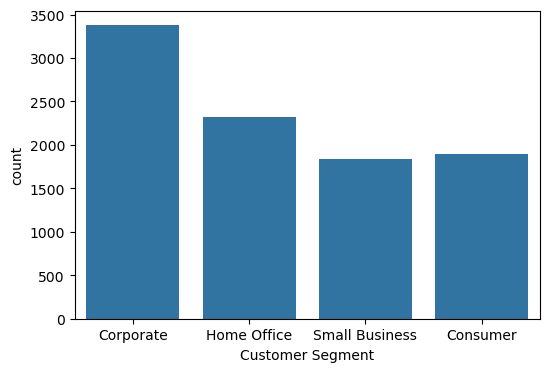

In [6]:
plt.figure(figsize=(6,4))

sns.countplot(data=df,x = 'Customer Segment')

## Customer Segment Analysis

**Key Insights:**

* **Corporate** is the largest customer segment.
* **Consumer** is the second-largest segment.
* **Home Office** and **Small Business** are smaller segments.

**Recommendations:**

1. **Prioritize Corporate:** Focus on retention and loyalty programs.
2. **Expand Consumer Base:** Invest in marketing and partnerships.
3. **Target Home Office & Small Business:** Develop tailored solutions.


# Product Category

<Axes: xlabel='Product Category', ylabel='count'>

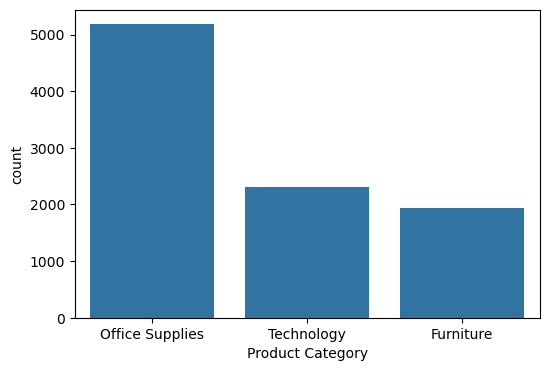

In [7]:
plt.figure(figsize=(6,4))

sns.countplot(data=df,x = 'Product Category')

## **📊 Product Category Analysis**

**Key Insights**

* **Office Supplies** 📦 is the most popular product category, accounting for the highest number of purchases.
* **Technology** 💻 is the second-most popular category.
* **Furniture** 🪑 is the least popular category.

**Recommendations**

1. **Leverage Office Supplies:** 📈 Continue to promote and expand the Office Supplies category. Consider offering bundle deals or loyalty programs to further boost sales. 
2. **Promote Technology:** 🚀 Implement targeted marketing campaigns to increase awareness and drive sales in the Technology category.
3. **Re-evaluate Furniture:** 🤔 Analyze the factors contributing to the lower demand for Furniture. Consider offering discounts, promotions, or redesigning the product range to attract more ll categories.

### Following plots gives more details about each Category ###

<Axes: xlabel='Product Category', ylabel='count'>

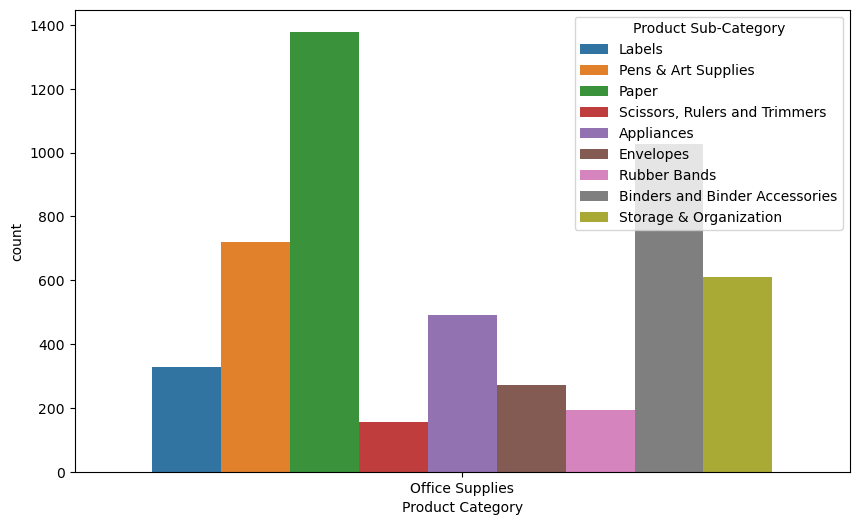

In [59]:
plt.figure(figsize=(10,6))

sns.countplot(data=df[df['Product Category'] =="Office Supplies"],x ='Product Category',hue = "Product Sub-Category")

<Axes: xlabel='Product Category', ylabel='count'>

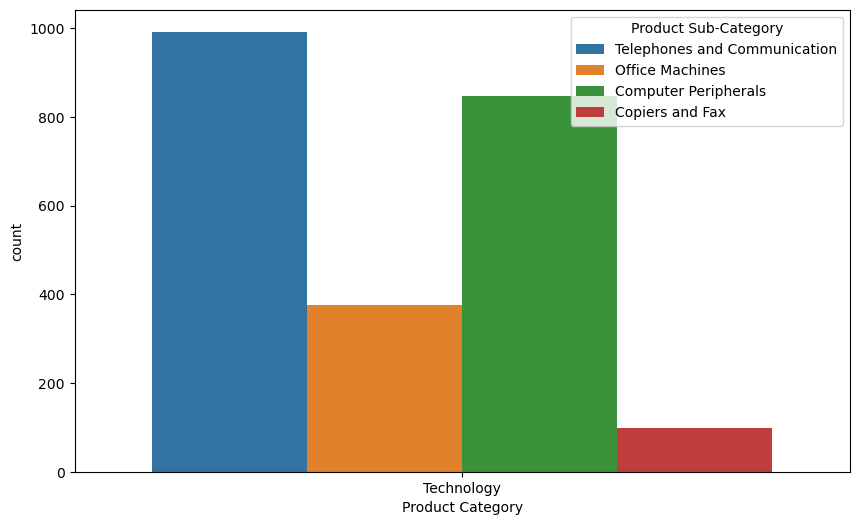

In [8]:
plt.figure(figsize=(10,6))

sns.countplot(data=df[df['Product Category'] =="Technology"],x ='Product Category',hue = "Product Sub-Category")

<Axes: xlabel='Product Category', ylabel='count'>

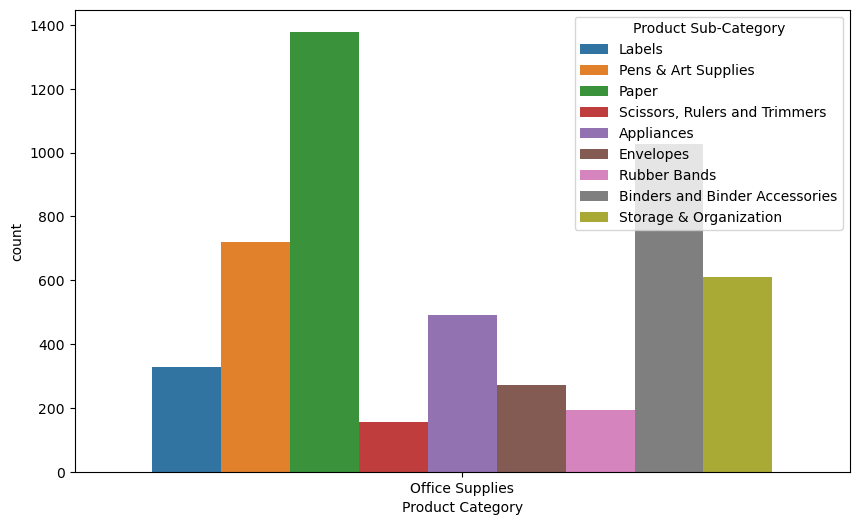

In [9]:
plt.figure(figsize=(10,6))

sns.countplot(data=df[df['Product Category'] =="Office Supplies"],x ='Product Category',hue = "Product Sub-Category")

<Axes: xlabel='Product Category', ylabel='count'>

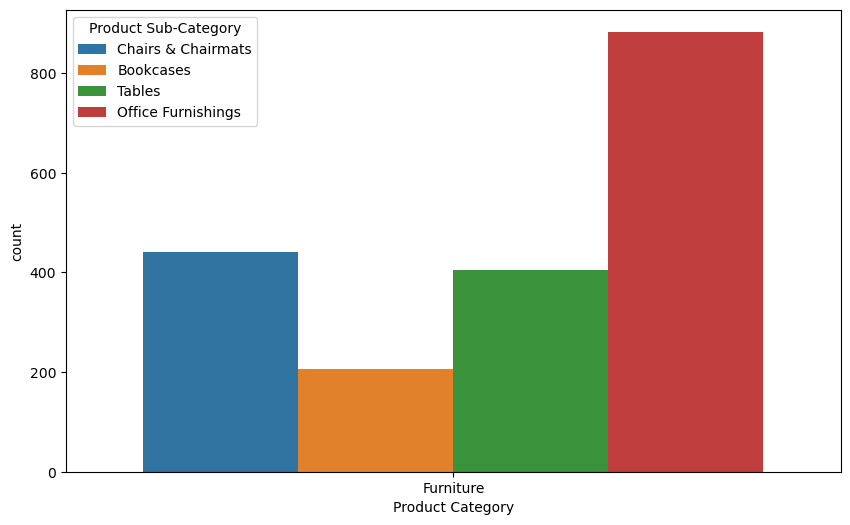

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(data=df[df['Product Category'] =="Furniture"],x ='Product Category',hue = "Product Sub-Category")

In [12]:
df['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

## Ship mode

In [13]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

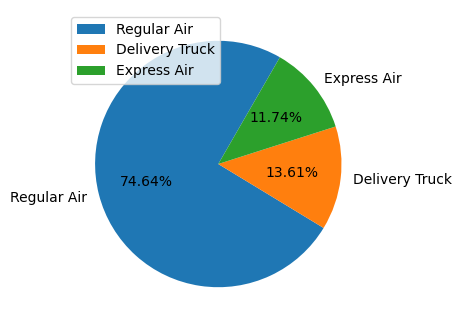

In [16]:
plt.figure(figsize=(5,4))

plt.pie(y,labels = x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)

## **Ship Mode Analysis** 

**Key Insights:**

* **Regular Air** ✈️ is the clear winner, accounting for a significant **74.64%** of all shipments. 
* **Delivery Truck** 🚚 and **Express Air** 🚀 lag behind with **13.61%** and **11.74%** respectively.

**Recommendations:**

1. **Leverage Regular Air:** 
    * Given its popularity, consider offering incentives or discounts to further boost its usage.
    * Optimize the Regular Air shipping process to improve efficiency and reduce costs.
2. **Re-evaluate Delivery Truck and Express Air:**
    * Analyze the reasons for their lower usage. 
    * Consider offering competitive pricing, faster delivery times, or specialized services to make these options more attractive.
    * Evaluate their cost-effectiveness to identify potential cost-saving measures.
)
 satisfaction.

`

In [15]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

<Axes: xlabel='Ship Mode', ylabel='count'>

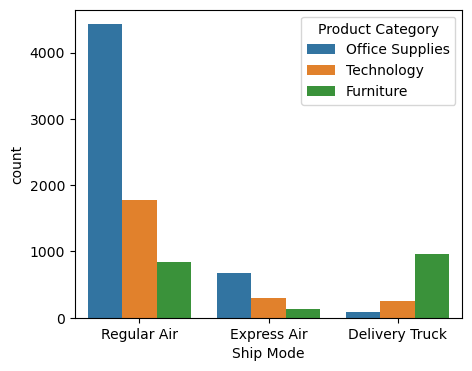

In [17]:
plt.figure(figsize=(5,4))

sns.countplot(data=df,x = 'Ship Mode',hue='Product Category')

### Shipping Mode Analysis by Product Category

- *Regular Air* dominates as the primary shipping mode, especially for *Office Supplies*, indicating a preference for quick yet cost-effective delivery.
- *Technology* and *Furniture* categories show a lower frequency of usage in *Express Air* and *Delivery Truck* modes, hinting at selective shipping based on item type and urgency.
- *Furniture* utilizes the *Delivery Truck* mode more frequently than other categories, likely due to size and handling requirements.

> *Insight:* Tailoring shipping strategies by product type could enhance logistics efficiency and customer satisfaction.

## Order Priority

In [18]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [19]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [21]:
df['Order Priority'] = df['Order Priority'].replace("Critical ","Critical")

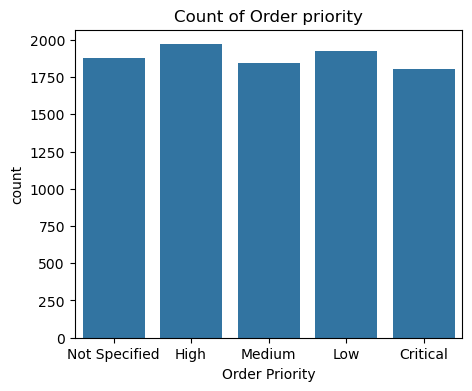

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x = df['Order Priority'])
plt.title("Count of Order priority")
plt.savefig("Count of order priority.jpg",dpi=500)

## Order Priority Analysis 📊

**Key Findings:**

* **Most orders are "Not Specified" 😕**
* **Medium and Low priority orders are common 📈**
* **High and Critical priority orders are less frequent ions:**

1. **Clarify Priorities 🎯:** Implement a system to require customers to specify order priorities.
2. **Optimize Resource Allocation 🛠️:** Allocate resources efficiently to handle urgent orders.
3. **Improve Communication 💬:** Provide regular updates to customers, especially for high-priority orders.
4. **Leverage Data 📊:** Continuously analyze order priority data to make informed decisions.

# **THE END!**
